In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
def get_df(drop_species=True):
    df = pd.read_csv("Iris.csv", header=0)
    if drop_species:
        df = df.drop('Species', axis=1)
    df = df.drop('Id', axis=1)
    return df

In [23]:
df = get_df()
display(df.head(5))
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


bude se snazit predikovat treba PetalWidthCm tak protoze to ma koeficient korelace s sepalLength a petalLength vysoky(zalezi na absolutni hodnote) tak pouziju tyhle promeny v modelu

Normalni OLS

In [4]:
x = df['PetalWidthCm']
y = df['PetalLengthCm']

x = sm.add_constant(x) # pridam konstantu - intercept linearni funkce
model = sm.OLS(y,x,missing="raise") # vytvorim ols model, pokud nejaka hodnota chybi vyhodim chybu
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           5.78e-86
Time:                        15:09:00   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0906      0.073     14.951   

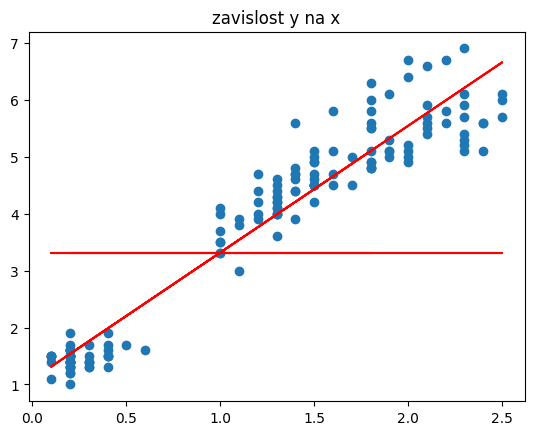

In [5]:
intercept, slope = model_fit.params
model_lin_funkce = intercept + slope * x #proste vzorec linearni funkce (modelu)


plt.title(f"zavislost y na x")
plt.scatter(x['PetalWidthCm'],y) # nemuzu udelt jenom x protoze x je dataframe co majeste jeden sloupec s konstantou(interceptem)
plt.plot(x["PetalWidthCm"], model_lin_funkce, color = 'red')


OLS s dummy variable

In [6]:
df = get_df(drop_species=False)
set(df['Species'])
#>> pridani trech sloupcu, pro kazdej druh jeden
setosa = []
versicolor = []
virginica = []

for spec in df['Species']:
    if spec == "Iris-setosa":
        setosa.append(1)
        versicolor.append(0)
        virginica.append(0)
        
    if spec == "Iris-versicolor":
        setosa.append(0)
        versicolor.append(1)
        virginica.append(0)
        
    if spec == "Iris-virginica":
        setosa.append(0)
        versicolor.append(0)
        virginica.append(1)
# pripojim tyhle sloupce k tomu hlavnimu dataframu
setosa_column = pd.Series(setosa, name="IsSetosa")
versicolor_column = pd.Series(versicolor, name="IsVersicolor")
virginica_column = pd.Series(virginica, name="IsVirginica")

df['IsSetosa'] = setosa_column
df['IsVersicolor'] = versicolor_column
df['IsVirginica'] = virginica_column


In [7]:
x = df[['PetalWidthCm','IsSetosa','IsVersicolor', 'IsVirginica']]
y = df['PetalLengthCm']

x = sm.add_constant(x) # pridam konstantu - intercept linearni funkce
model_dummy_var = sm.OLS(y,x,missing="raise") # vytvorim ols model, pokud nejaka hodnota chybi vyhodim chybu
model_dummy_var_fit = model.fit()
print(model_dummy_var_fit.summary())
#graf
print(model_dummy_var_fit.params)
intercept, slope_petalWidthCm, slope_setosa, slope_versicolor, slope_virginica = model_fit.params
model_dummy_var_lin_funkce = intercept + slope_petalWidthCm*df['PetalWidthCm'] + slope_setosa*df['IsSetosa'] + slope_versicolor*df['IsVersicolor'] + slope_virginica*df['IsVirginica']


#? tohle bych musel kreslit na takovym to multidymenzionalnim grafu ne???
#plt.title(f"zavislost y na x")
#plt.scatter(x['PetalWidthCm'],y) # nemuzu udelt jenom x protoze x je dataframe co majeste jeden sloupec s konstantou(interceptem)
#plt.plot(x["PetalWidthCm"], model_dummy_var_lin_funkce, color = 'red')
#? podle vysokyho JB skore nejsou data normalne rozlozeny takze ted bych zkusil log nebo exp ...??
#? nebo to nejak zkresluje to ze mam tu spoustu jednicek nebo nul, protoze predtim nez jsem pridal dummy variables bylo to vpohode???

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           5.78e-86
Time:                        15:09:01   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0906      0.073     14.951   

ValueError: not enough values to unpack (expected 5, got 2)

Nelinearni transformace

logaritmizace

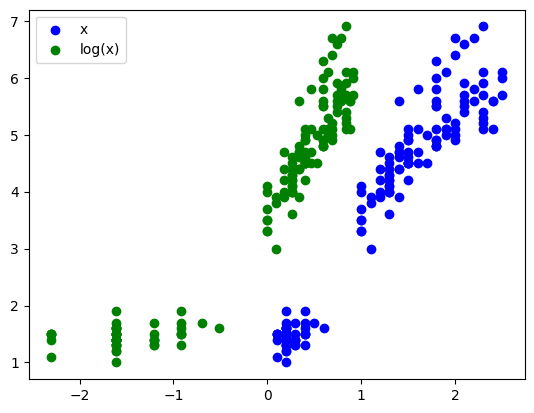

In [ ]:
df_log = get_df()
x = df_log['PetalWidthCm']
y = df_log['PetalLengthCm']
x_log = np.log(x)

plt.scatter(x,y, color="blue", label="x")
plt.scatter(x_log,y, color="green", label='log(x)')
plt.legend()

In [ ]:

#? proc to logaritmizace udelala vic konvexni?

OLS po logaritmizeci

In [ ]:
x = x_log
y = y

x = sm.add_constant(x) # pridam konstantu - intercept linearni funkce
model = sm.OLS(y,x,missing="raise") # vytvorim ols model, pokud nejaka hodnota chybi vyhodim chybu
model_log_fit = model.fit()
print(model_log_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1223.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.94e-73
Time:                        17:18:55   Log-Likelihood:                -130.53
No. Observations:                 150   AIC:                             265.1
Df Residuals:                     148   BIC:                             271.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0561      0.048     84.081   

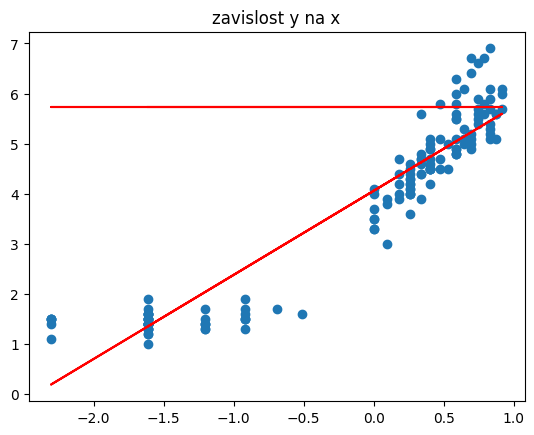

In [ ]:
intercept, slope = model_log_fit.params
model_log_lin_funkce = intercept + slope * x #proste vzorec linearni funkce (modelu)


plt.title(f"zavislost y na x")
plt.scatter(x['PetalWidthCm'],y) # nemuzu udelt jenom x protoze x je dataframe co majeste jeden sloupec s konstantou(interceptem)
plt.plot(x["PetalWidthCm"], model_log_lin_funkce, color = 'red')

#? proc se tam sakra kresli ta cara na konstante z model_log_lin_funkce

Exponencializace

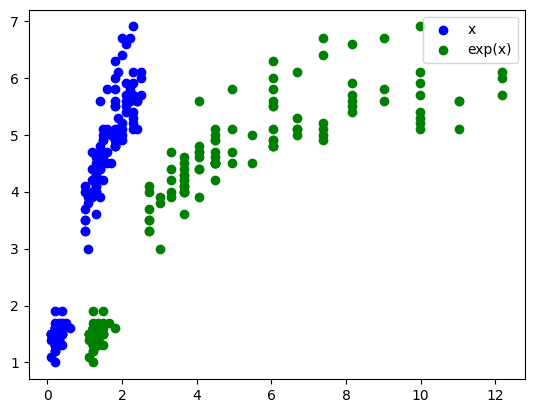

In [ ]:
df_exp = get_df()
x = df_exp['PetalWidthCm']
y = df_exp['PetalLengthCm']
x_exp = np.exp(x) # exp vrati "e" na "x"-tou

plt.scatter(x,y, color="blue", label="x")
plt.scatter(x_exp,y, color="green", label='exp(x)')
plt.legend()

Ols po exponencionalizaci

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     445.2
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           1.82e-46
Time:                        17:18:56   Log-Likelihood:                -193.39
No. Observations:                 150   AIC:                             390.8
Df Residuals:                     148   BIC:                             396.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5622      0.127     12.331   

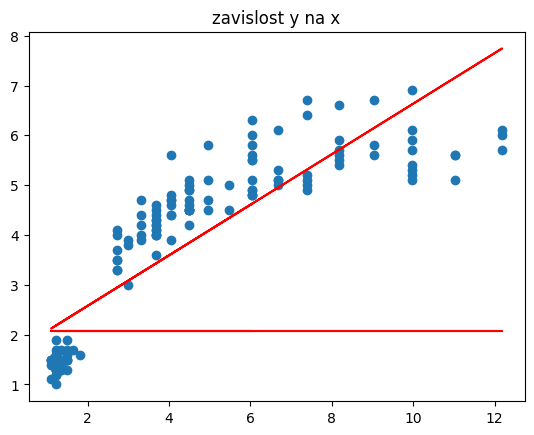

In [ ]:
x = x_exp
y = y

x = sm.add_constant(x) # pridam konstantu - intercept linearni funkce
model = sm.OLS(y,x,missing="raise") # vytvorim ols model, pokud nejaka hodnota chybi vyhodim chybu
model_exp_fit = model.fit()
print(model_exp_fit.summary())
intercept, slope = model_exp_fit.params
model_exp_lin_funkce = intercept + slope * x #proste vzorec linearni funkce (modelu)


plt.title(f"zavislost y na x")
plt.scatter(x['PetalWidthCm'],y) # nemuzu udelt jenom x protoze x je dataframe co majeste jeden sloupec s konstantou(interceptem)
plt.plot(x["PetalWidthCm"], model_exp_lin_funkce, color = 'red')


In [ ]:

#? co stim mam delat "kvedraticky"

ted vsechno dohromady u sebe

In [ ]:
print("BEZ TRANFORAMCE")
print(model_fit.summary())
print("\n")
print("S LOG TRANSFORMACI")
print(model_log_fit.summary())
print("\n")
print("S EXP TRANSFORMACI")
print(model_exp_fit.summary())
print("\n")

BEZ TRANFORAMCE
                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           5.78e-86
Time:                        17:18:56   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0906      0.0